## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Import Data

In [2]:
file_path = '/kaggle/input/heart-disease-dataset/heart-disease.csv'
df = pd.read_csv(file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Are there any missing values?

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### **Inference : No missing value**

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Count of having heart disease or not

In [7]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

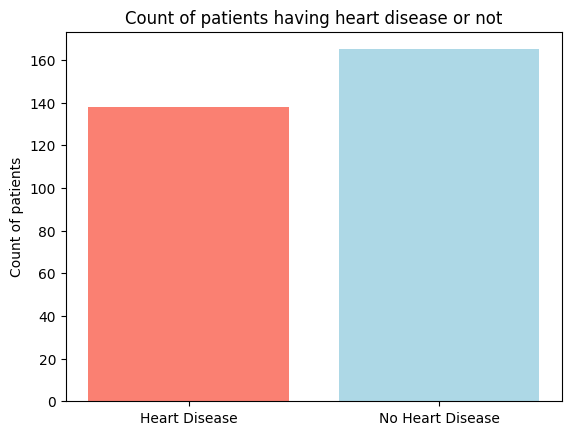

In [8]:
fig, ax = plt.subplots()

x = ["Heart Disease", "No Heart Disease"]
counts = [df['target'].value_counts()[0], df['target'].value_counts()[1]]

ax.bar(x, counts, color=['salmon', 'lightblue'])
ax.set_title("Count of patients having heart disease or not")
ax.set_ylabel("Count of patients");

Count of Heart Disease sample = 165
count of No Heart Disease sample = 138

#### **Inference : Dataset is balanced as number of samples of each class are roughly equal.**

### Heart disease counts according to sex

In [9]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


#### **Inference : Above table shows that 75% chance of heart disease in female and 45% chance of heart disease in male.**

We can deduce the same conclusion by drawing graph.

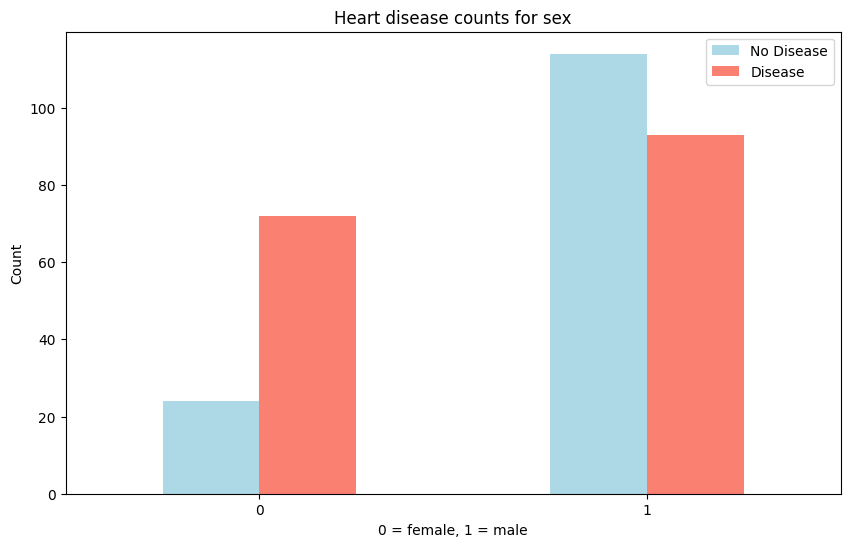

In [10]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar', color=['lightblue', 'salmon'], figsize=(10,6))

plt.title("Heart disease counts for sex")
plt.xlabel('0 = female, 1 = male')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

### Age vs. Max heart Rate for Heart Disease

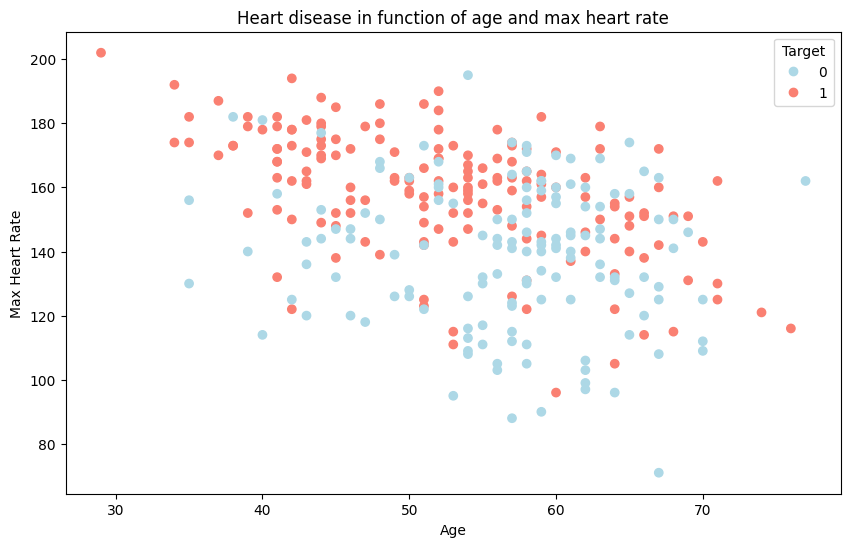

In [11]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(figsize=(10,6))

cmap = mcolors.ListedColormap(['lightblue', 'salmon'])
scatter = ax.scatter(df['age'], df['thalach'], c=df['target'], cmap=cmap)
ax.set_title("Heart disease in function of age and max heart rate")
ax.set_xlabel("Age")
ax.set_ylabel("Max Heart Rate")
ax.legend(*scatter.legend_elements(), title="Target");

#### **Inference : In younger age groups, heart disease is more commonly found in individuals with higher heart rates, while in older age groups, heart disease is prevalent across all heart rates.**

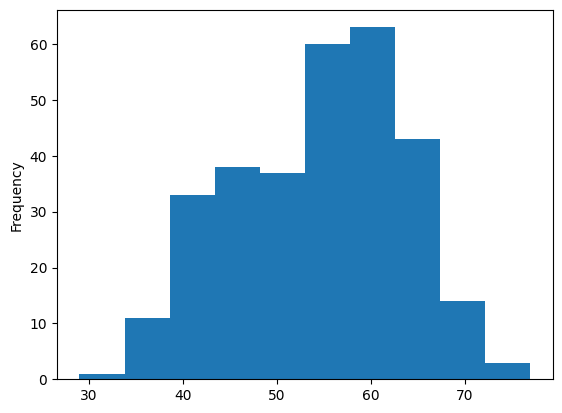

In [12]:
# Distribution of age using histogram.
df['age'].plot(kind='hist');

### Correlation

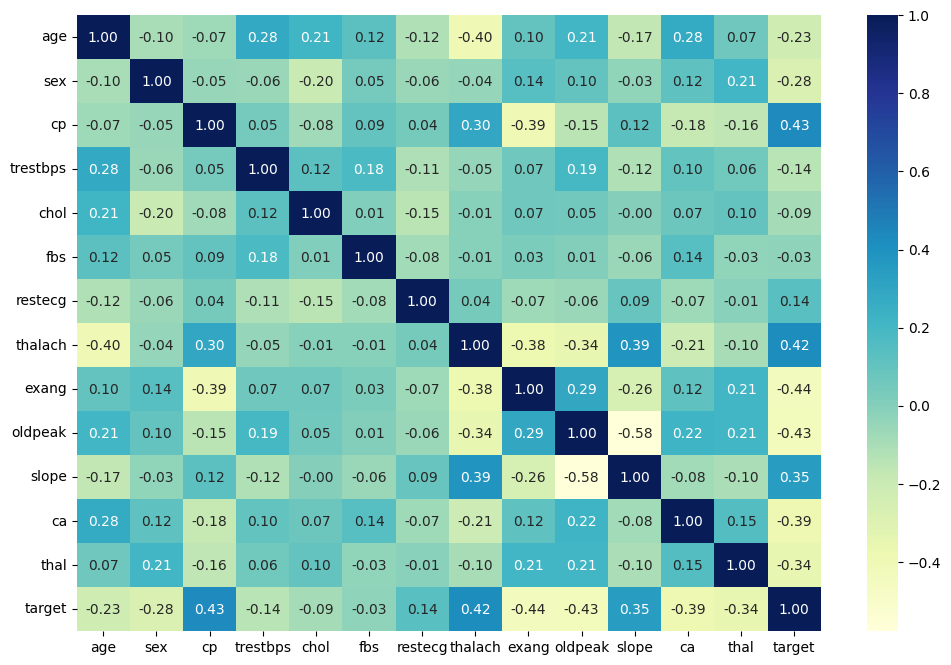

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap="YlGnBu");

#### Inference : There is no such strong correlation.
  -

## Modelling

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Split the data into X and y
X = df.drop('target', axis = 1)
y = df['target']

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
np.random.seed(42)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [20]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


As we know this problem is of classification type. Hence we will use these three models:
- Logistic Regression
- K-Nearest Neighours Classifier
- Random Forest Classifier

In [21]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
    Fit and train models simultaneously
  """
  models_score = {}

  for key, values in models.items():
    model = values
    model.fit(X_train, y_train)
    models_score[key] = model.score(X_test, y_test)

  return models_score

In [22]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

models_score = fit_and_score(models, X_train, X_test, y_train, y_test)
models_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8524590163934426}

### Model Comparision

<Axes: >

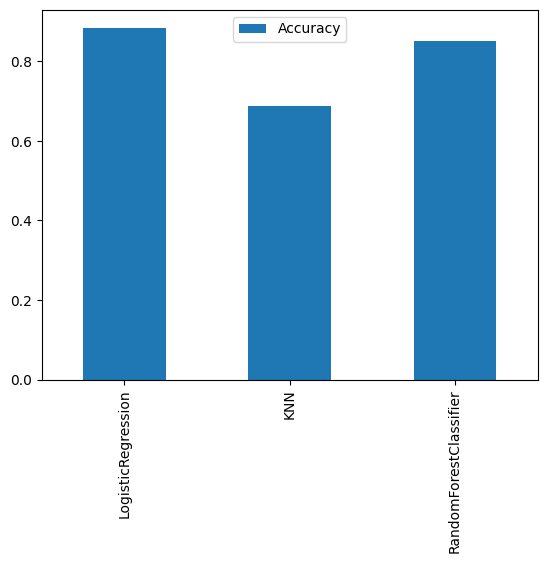

In [23]:
model_compare = pd.DataFrame(models_score, index=["Accuracy"])
model_compare.T.plot(kind='bar')

#### **Inference : Here we can see that LogisticRegression and RandomForestClassifier are doing well as compared to KNN.**

Hence, we will move forward with LogisticRegression and RandomForestClassifier models.
First create a function to store the different score metrics for different model for future use.

In [24]:
def pred_metrics(model, X_test, y_true):

  # accuracy = cross_val_score(model, X, y,  scoring='accuracy').mean()
  # precision = cross_val_score(model, X, y, scoring='precision').mean()
  # recall = cross_val_score(model, X, y, scoring='recall').mean()
  # f1 = cross_val_score(model, X, y, scoring='f1').mean()
  y_preds = model.predict(X_test)
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)

  metric_dict = {
      "Accuracy": round(accuracy,8),
      "Precision": round(precision,8),
      "Recall": round(recall,8),
      "F1": round(f1,8),
  }

  return metric_dict

Base Logisitc Regression performance

In [25]:
lr_base_model_metrics = pred_metrics(models['LogisticRegression'], X_test, y_test)
lr_base_model_metrics

{'Accuracy': 0.8852459,
 'Precision': 0.87878788,
 'Recall': 0.90625,
 'F1': 0.89230769}

Base Random Forest Classifier performance

In [26]:
rfc_base_model_metrics = pred_metrics(models['RandomForestClassifier'], X_test, y_test)
rfc_base_model_metrics

{'Accuracy': 0.85245902,
 'Precision': 0.84848485,
 'Recall': 0.875,
 'F1': 0.86153846}

## Hyperparameter Tuning

### Hyperparamter Tuning using RandomizedSearchCV

In [27]:
# Hyperparameter grid for LogisiticRegression
lr_rs_grid = {
    "solver" : ["liblinear", 'lbfgs', 'newton-cg'],
    "C" : np.logspace(-4, 4, num=20, base=10),
    "max_iter" : [1000, 1500, 2000]
}

# Hyperparameter grid for RandomForestClassifier
rfc_rs_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

Logistic Regression

In [28]:
lr_rs_model = RandomizedSearchCV(models['LogisticRegression'], lr_rs_grid, cv=5, n_iter=20)
lr_rs_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1000, 1500, 2000],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg']})

In [29]:
lr_rs_model.best_params_

{'solver': 'liblinear', 'max_iter': 2000, 'C': 0.23357214690901212}

In [30]:
lr_rs_model.score(X_test, y_test)

0.8852459016393442

In [31]:
lr_rs_model.best_estimator_

LogisticRegression(C=0.23357214690901212, max_iter=2000, solver='liblinear')

In [32]:
lr_rs_model_metrics = pred_metrics(lr_rs_model.best_estimator_, X_test, y_test)
lr_rs_model_metrics

{'Accuracy': 0.8852459,
 'Precision': 0.87878788,
 'Recall': 0.90625,
 'F1': 0.89230769}

Random Forest Classifier

In [33]:
rfc_rs_model = RandomizedSearchCV(models['RandomForestClassifier'], rfc_rs_grid, cv=5, n_iter=20)
rfc_rs_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [34]:
rfc_rs_model.best_params_

{'n_estimators': 310,
 'min_samples_split': 18,
 'min_samples_leaf': 13,
 'max_depth': 5}

In [35]:
rfc_rs_model.score(X_test, y_test)

0.8688524590163934

In [36]:
rfc_rs_model_metrics = pred_metrics(rfc_rs_model.best_estimator_, X_test, y_test)
rfc_rs_model_metrics

{'Accuracy': 0.86885246,
 'Precision': 0.85294118,
 'Recall': 0.90625,
 'F1': 0.87878788}

In [37]:
lr_rs_model_metrics

{'Accuracy': 0.8852459,
 'Precision': 0.87878788,
 'Recall': 0.90625,
 'F1': 0.89230769}

### Compare all four models
(Base logisticRegression, Base RandomForestClassifier, RandomizedLogisisticRegression and RandomizedRandomForesClassifier)

In [38]:
compare_base_and_rs_metrics = pd.DataFrame({
    "lr_base": lr_base_model_metrics,
    "rfc_base": rfc_base_model_metrics,
    "lr_rs": lr_rs_model_metrics,
    "rfc_rs": rfc_rs_model_metrics
})

compare_base_and_rs_metrics

,lr_base,rfc_base,lr_rs,rfc_rs
Accuracy,0.885246,0.852459,0.885246,0.868852
Precision,0.878788,0.848485,0.878788,0.852941
Recall,0.906250,0.875000,0.906250,0.906250
F1,0.892308,0.861538,0.892308,0.878788


<Axes: >

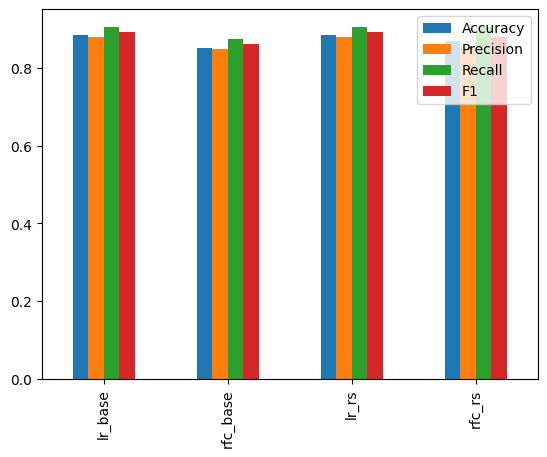

In [39]:
compare_base_and_rs_metrics.T.plot.bar()

As we can see that lr_rs(logisticRegression from randomizedSearchCV) has more accuracy(If we emphasis more on accuracy than other metric) work better than other three.

Hence, We will move forward with LogisticRegression and apply GridSearchCV on it.

### GridSearchCV
Apply GridSearchCV on LogisticRegression

In [40]:
# Hyperparameter grid for LogisiticRegression(for GridSearchCV)
lr_rs_grid = {
    "solver" : ["liblinear", 'newton-cg'],
    "C" : np.logspace(-5, 5, num=30),
    "max_iter" : [1000, 1500, 2000, 2500]
}

In [41]:
lr_gs_model = GridSearchCV(models['LogisticRegression'], lr_rs_grid, cv=5)
lr_gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05]),
                         'max_iter': [1000, 1500, 2000, 2500],
                         'solver': ['liblinear', 'newton-cg']})

In [42]:
lr_gs_model.best_params_

{'C': 0.3039195382313201, 'max_iter': 1000, 'solver': 'newton-cg'}

In [43]:
lr_gs_model.score(X_test, y_test)

0.8852459016393442

In [44]:
lr_gs_model_metrics = pred_metrics(lr_gs_model.best_estimator_, X_test, y_test)
lr_gs_model_metrics

{'Accuracy': 0.8852459,
 'Precision': 0.87878788,
 'Recall': 0.90625,
 'F1': 0.89230769}

In [45]:
compare_base_and_rs_metrics

,lr_base,rfc_base,lr_rs,rfc_rs
Accuracy,0.885246,0.852459,0.885246,0.868852
Precision,0.878788,0.848485,0.878788,0.852941
Recall,0.906250,0.875000,0.906250,0.906250
F1,0.892308,0.861538,0.892308,0.878788


After comparing logisticRegression base model, RandomizedSearch logisticRegression model and GridSearch logisticRegression we found that that is not such differnce. Hence we can move forward with any of three model

## Model Evaluation
- Accuracy
- Area under ROC curve
- Confusion matrix
- Classification report

In [46]:
lr_final_model = lr_rs_model.best_estimator_
lr_final_model_preds = lr_final_model.predict(X_test)

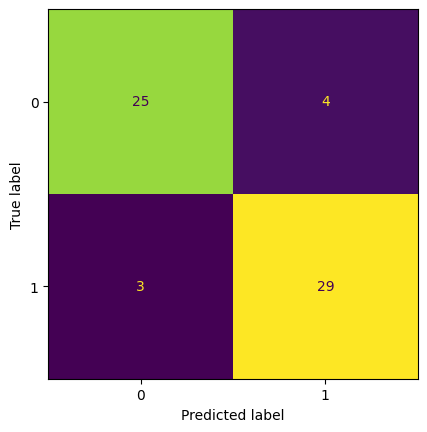

In [47]:
ConfusionMatrixDisplay.from_estimator(lr_final_model, X_test, y_test,colorbar=False);

ROC and AUC

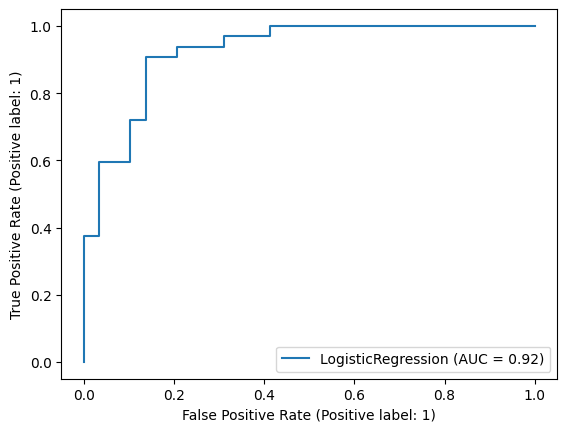

In [48]:
RocCurveDisplay.from_estimator(lr_final_model, X_test, y_test);

### Classification Report

In [49]:
print(classification_report(y_test,lr_final_model_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Evaluation metrics using cross-validation

#### Accuracy

In [50]:
np.random.seed(42)
lr_final_model_cv_acc = cross_val_score(lr_final_model, X, y, cv=5, scoring='accuracy').mean()
print(f'The cross-validated accuracy is {lr_final_model_cv_acc*100:.2f}')

The cross-validated accuracy is 84.80


#### Precision

In [51]:
np.random.seed(42)
lr_final_model_cv_precision = cross_val_score(lr_final_model, X, y, cv=5, scoring='precision').mean()
print(f'The cross-validated precision is {lr_final_model_cv_precision:.2f}')

The cross-validated precision is 0.82


#### Recall

In [52]:
np.random.seed(42)
lr_final_model_cv_recall = cross_val_score(lr_final_model, X, y, cv=5, scoring='recall').mean()
print(f'The cross-validated recall is {lr_final_model_cv_recall:.2f}')

The cross-validated recall is 0.93


#### F1

In [53]:
np.random.seed(42)
lr_final_model_cv_f1 = cross_val_score(lr_final_model, X, y, cv=5, scoring='f1').mean()
print(f'The cross-validated F1 is {lr_final_model_cv_f1:.2f}')

The cross-validated F1 is 0.87


### AUC

In [54]:
np.random.seed(42)
lr_final_model_cv_auc = cross_val_score(lr_final_model, X, y, cv=5, scoring='roc_auc').mean()
print(f'The cross-validated AUC score is is {lr_final_model_cv_auc:.2f}')

The cross-validated AUC score is is 0.90


### Visualize cross-validation score

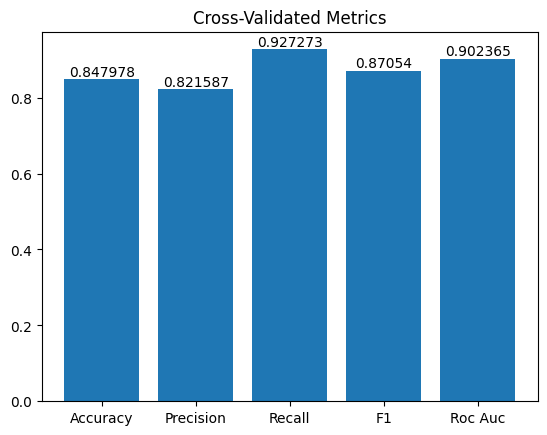

In [55]:
metric_name = ['Accuracy', 'Precision', 'Recall', 'F1', 'Roc Auc']
metric_value = [lr_final_model_cv_acc, lr_final_model_cv_precision, lr_final_model_cv_recall, lr_final_model_cv_f1, lr_final_model_cv_auc]

bar_container = plt.bar(metric_name, metric_value)
plt.bar_label(bar_container)
plt.title("Cross-Validated Metrics");

**Inference**:
- **Accuracy = 84.8 % => It means model correctly predicted the outcome(both heart disease and no heart disease) in 84.8% of the case.**
- **Precision = 82.1% => It means that out of prediction of heart dieseas, 82.8% of them truly have cancer.**
- **Recall = 92.7% => It means out of all the patients have heart disease, our model predicts 92% of them having heart disease.**

**Here, It is excellent at identifying patients with heart disease (92.7% recall) and fairly accurate in predicting heart disease for those who truly have it (82.1% precision).**

**It depend upon buisness task that we emphasis more on which on metrics(recall or precision). **

## Feature Importance

In [56]:
lr_final_model.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [57]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [58]:
feature_dict = dict(zip(df.columns, lr_final_model.coef_[0]))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003699,-0.904241,0.674728,-0.011613,-0.001704,0.047877,0.334902,0.024729,-0.631204,-0.57591,0.470951,-0.651653,-0.699842


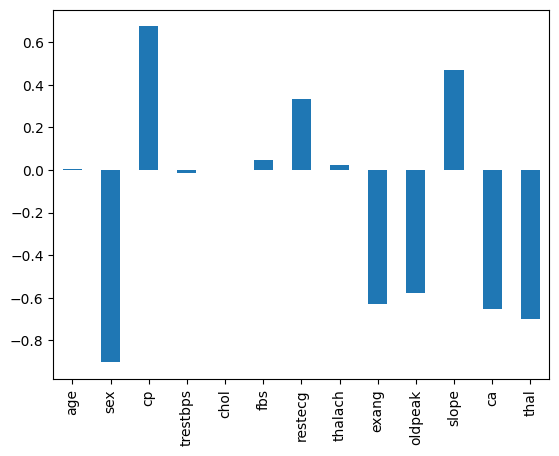

In [59]:
feature_df.T.plot.bar(legend=False);

Larger the value of coeffecient, the more it contributes to dicision making.
If value is negative then there is negative correlation and vice-versa for positive value.

**Inference:**

1. `sex` feature has larger negative value implies it has strong negative correlation.

It means that value of sex decrease(i.e 0) there is more chance of having a heart disease. We have seen earlier that female have 75% of change of heart.
Hence women have more chance of heart disease.

2. `slope` feature has larger positive value implies it has positive correlation

In [60]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


As we can notice form the table is that as slope increase chance of haveing heart disease also increases.(same logic goes with `cp`, `exang` and `thal` etc)

### Still there is lot of thing we can do
- Try different classification model(like SVM, XGboost)
- Try more hyper paramter
- Ask for more data samples.